### Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
train = pd.read_csv('/home/supershernon/Downloads/question_1_dataset/Train.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      4465 non-null   object
 1   category  4465 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 69.9+ KB


In [98]:
train.head(10)

,name,category
0,1.png,9
1,2.png,3
2,3.png,9
3,4.png,8
4,5.png,13
5,6.png,7
6,7.png,2
7,8.png,16
8,9.png,6
9,10.png,1


### Collected all images in a list

In [34]:
img = []
for imate in train['name']:
    img.append(imate)

### Code to change the current directory to folder in which training images are stored

In [35]:
import os
base_dir = '/home/supershernon/Downloads/question_1_dataset'
img_dir = base_dir+'/train/train'
os.chdir(img_dir)
print(base_dir)
print(img_dir)

/home/supershernon/Downloads/question_1_dataset
/home/supershernon/Downloads/question_1_dataset/train/train


### Parsed all the images and stored them in a list "images"

In [37]:
images = []
IMG_SIZE = 100

for im in img:
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    images.append(image)

### This resolution of image looks good so I will take image size to be (100,100)

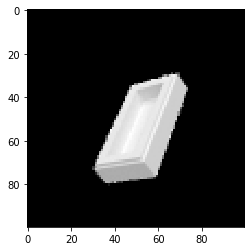

In [38]:
imh=images[0]
plt.imshow(imh, cmap='gray')
plt.show()

### Stored all the corresponding label values in a list "labels" and decrememented every value 1 to easily train data on convolution neural network

In [39]:
labels = []
for label in train['category']:
    labels.append(label-1)

### Code to show all 16 different images along with their labels below the image

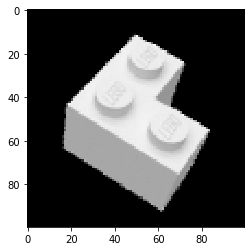

0


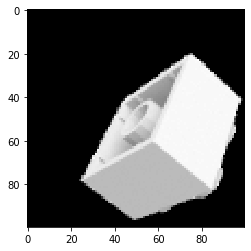

1


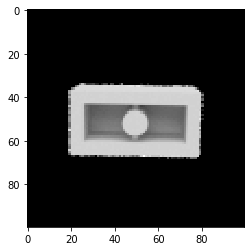

2


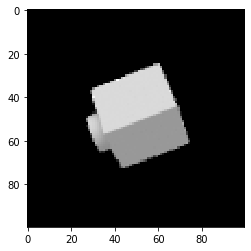

3


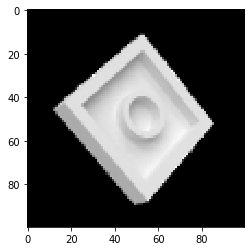

4


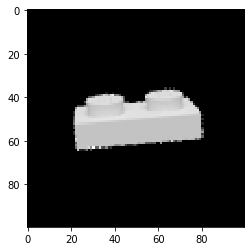

5


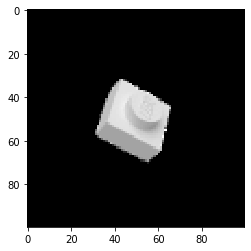

6


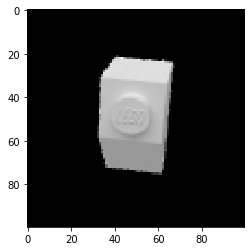

7


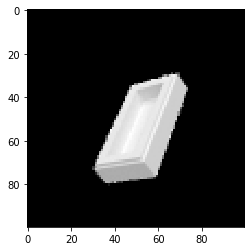

8


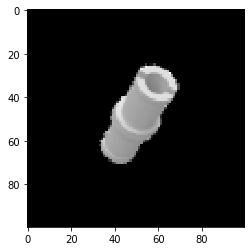

9


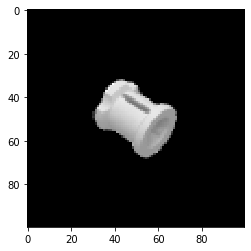

10


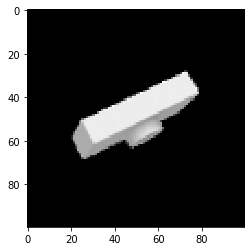

11


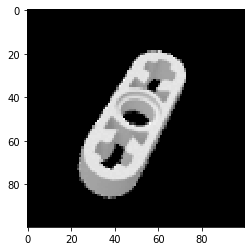

12


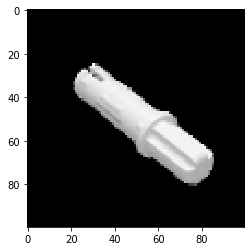

13


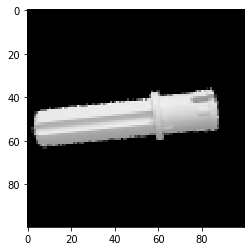

14


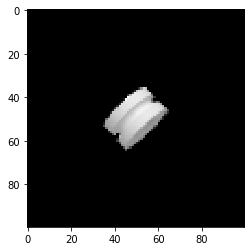

15


In [71]:
IMG_SIZE = 100
for i in range(1,17):
    val = train[train['category']==i]
    z = cv2.imread(val.iloc[0]['name'], cv2.IMREAD_GRAYSCALE)
    z = cv2.resize(z, (IMG_SIZE, IMG_SIZE))
    plt.imshow(z, cmap='gray')
    plt.show()
    print(val.iloc[0]['category']-1)

### Reshaping the "images" list and converting the data in it in the format 'unit8' to 'float32' as model is incompatible with 'uint8' format and functional only in the form of numpy array

In [14]:
images = np.array(images, dtype = 'float32').reshape(-1, 100, 100, 1)

In [15]:
labels = np.array(labels).reshape(-1, 1)

### Splitted the train to test data as 80:20 ratio

In [16]:
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split( images, labels, test_size=0.20, random_state=42)

In [17]:
n_train = len(train_labels)
n_test = len(test_labels)
print(n_train, n_test)


3572 893


### Implemented Convolution Neural Network with Keras in order to classify images into 16 different classes.

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

### The model is implemented using 2 layers of extracting features from the image using Conv2D, then resizing the layers after feature extraction. Flatten is used to convert 2D array of image into 1D array. The model also has two Dense layers to collect the output. The last Dense layer has 16 neurons each representing different class of images.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 1)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.softmax)
])

### Compiling and training the train data on model

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(train_images, train_labels, epochs=4)

Train on 3572 samples
Epoch 1/4
3572/3572 [==============================] - 24s 7ms/sample - loss: 0.1583 - accuracy: 0.9443
Epoch 2/4
3572/3572 [==============================] - 20s 6ms/sample - loss: 0.1140 - accuracy: 0.9535
Epoch 3/4
3572/3572 [==============================] - 21s 6ms/sample - loss: 0.0818 - accuracy: 0.9695
Epoch 4/4
3572/3572 [==============================] - 20s 6ms/sample - loss: 0.0566 - accuracy: 0.9807


In [32]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

893/893 [==============================] - 2s 2ms/sample - loss: 0.3922 - accuracy: 0.8723
Test accuracy: 0.87234044


#### The model is overfitted since accuracy on training images is greater than test images, however it is good enough.

In [23]:
predictions = model.predict(test_images)

In [24]:
np.argmax(predictions[3])

15

In [25]:
test_labels[3]

array([15])

### Changing the current directory to test folder

In [73]:
test_dir = base_dir+'/test/test'
os.chdir(test_dir)
print(base_dir)
print(test_dir)

/home/supershernon/Downloads/question_1_dataset
/home/supershernon/Downloads/question_1_dataset/test/test


### Loading the test images in a list

In [86]:
final_images = []
IMG_SIZE = 100

for im in os.listdir(test_dir):
    image = cv2.imread(im, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    final_images.append(image)

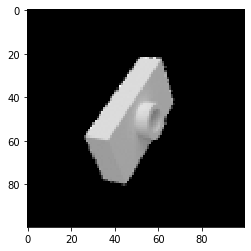

In [87]:
imhap=final_images[0]
plt.imshow(imhap, cmap='gray')
plt.show()

### Below line is for processing the test images in the same way of train images

In [82]:
final_images_temp = np.array(final_images, dtype = 'float32').reshape(-1, 100, 100, 1)

### Value Prediction. I have classified images in class values 0-15.

In [83]:
final_predictions = model.predict(final_images_temp)

### Predictions for 5 test images:

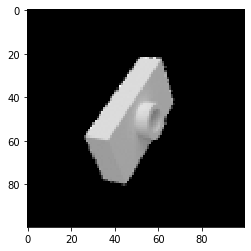

5

In [93]:
x = final_images[0]
plt.imshow(x, cmap='gray')
plt.show()
np.argmax(final_predictions[0])

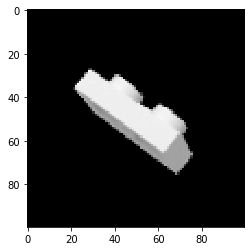

5

In [94]:
x = final_images[1]
plt.imshow(x, cmap='gray')
plt.show()
np.argmax(final_predictions[1])

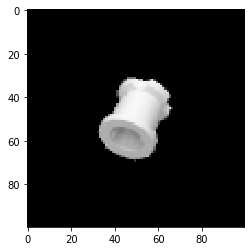

10

In [95]:
x = final_images[2]
plt.imshow(x, cmap='gray')
plt.show()
np.argmax(final_predictions[2])

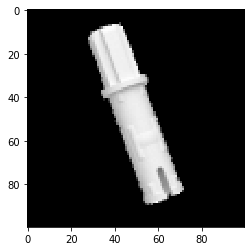

13

In [96]:
x = final_images[3]
plt.imshow(x, cmap='gray')
plt.show()
np.argmax(final_predictions[3])

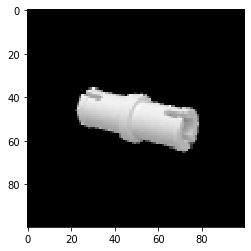

9

In [97]:
x = final_images[4]
plt.imshow(x, cmap='gray')
plt.show()
np.argmax(final_predictions[4])

### Output values are the labels for the 5 test images fed into model. These values can be verified by comparing with our actual image-label pair shown above.

### We can see that 1st predicted output is wrong while the rest 4 outputs are correct.